In [1]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

In [2]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["axes.unicode_minus"] = False

In [3]:
df = pd.read_csv("../../script/Project/data/경주기록(2014_23).csv", index_col = False)

C:\Users\yjg10\AppData\Local\Temp\ipykernel_17944\2020844894.py:1: DtypeWarning: Columns (49,83) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../../script/Project/data/경주기록(2014_23).csv", index_col = False)


In [4]:
df.head()

,Unnamed: 0,age,ageCond,birthday,buG1fAccTime,buG1fOrd,buG2fAccTime,buG2fOrd,buG3fAccTime,buG3fOrd,...,sj_4cOrd,trName,trNo,track,weather,wgBudam,wgBudamBigo,wgHr,wgJk,winOdds
0,0,2,연령오픈,20120328,48.8,1,36.8,1,25.1,2,...,0,김남중,70120,건조 (3%),맑음,53.0,-,504(-8),0,8.1
1,1,2,연령오픈,20120508,50.0,4,37.7,4,25.6,4,...,0,양귀선,70125,건조 (3%),맑음,53.0,-,495(+6),0,1.6
2,2,2,연령오픈,20120208,50.3,6,38.3,7,26.2,8,...,0,윤영훈,70133,건조 (3%),맑음,53.0,-,493(+6),0,4.1
3,3,3,연령오픈,20110127,49.7,2,37.3,3,25.3,3,...,0,이상영,70141,건조 (3%),맑음,55.0,-,498(+4),0,20.3
4,4,2,연령오픈,20120310,50.2,5,37.8,6,25.8,6,...,0,유충열,70139,건조 (3%),맑음,53.0,-,465(+2),0,53.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244997 entries, 0 to 244996
Data columns (total 91 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    244997 non-null  int64  
 1   age           244997 non-null  int64  
 2   ageCond       244997 non-null  object 
 3   birthday      244997 non-null  int64  
 4   buG1fAccTime  244997 non-null  float64
 5   buG1fOrd      244997 non-null  int64  
 6   buG2fAccTime  244997 non-null  float64
 7   buG2fOrd      244997 non-null  int64  
 8   buG3fAccTime  244997 non-null  float64
 9   buG3fOrd      244997 non-null  int64  
 10  buG4fAccTime  244997 non-null  float64
 11  buG4fOrd      244997 non-null  int64  
 12  buG6fAccTime  244997 non-null  float64
 13  buG6fOrd      244997 non-null  int64  
 14  buG8fAccTime  244997 non-null  float64
 15  buG8fOrd      244997 non-null  int64  
 16  buS1fAccTime  244997 non-null  float64
 17  buS1fOrd      244997 non-null  int64  
 18  buS1

In [6]:
df = df[df['rank'] == '국6등급']

In [7]:
df['Spd'] = df['rcDist'] / df['rcTime']

In [8]:
corr = df.corr(numeric_only = True)['Spd']

In [9]:
corr.sort_values(ascending = False).to_csv("./corr.csv")

In [10]:
df['wgBudam']

25983     55.0
25984     53.0
25985     55.0
25986     52.0
25987     53.0
          ... 
240137    56.5
240138    56.5
240139    54.5
240140    56.5
240141    54.5
Name: wgBudam, Length: 46663, dtype: float64

In [11]:
df['Spd']

25983     16.025641
25984     15.698587
25985     15.673981
25986     15.625000
25987     15.527950
            ...    
240137    14.567266
240138    14.554795
240139    14.542344
240140    14.455782
240141    13.821138
Name: Spd, Length: 46663, dtype: float64

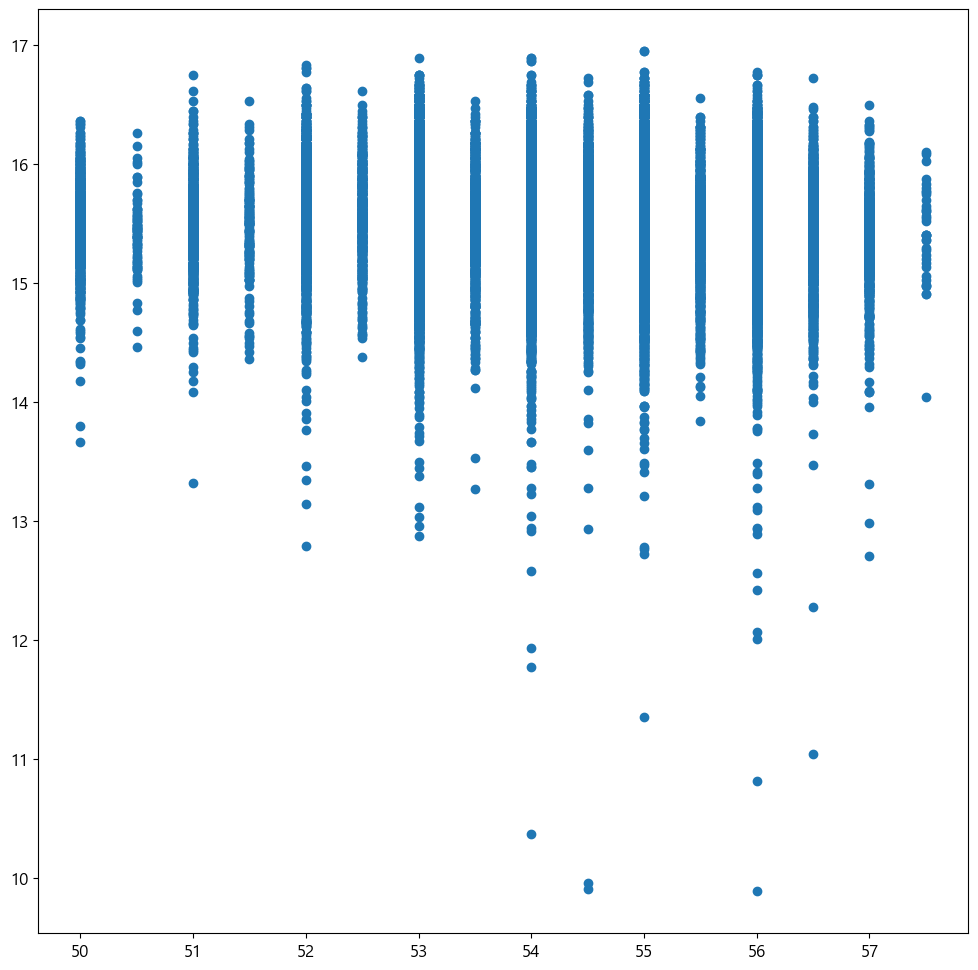

In [12]:
plt.figure(figsize = (12, 12))
plt.scatter(df['wgBudam'], df['Spd'])
plt.show()

In [13]:
ord_1 = df[df['ord'] == 1]

In [14]:
ord_10 = df[df['ord'] == 10]

In [15]:
corr.sort_values(ascending = False)

Spd          1.000000
chaksun2     0.254698
chaksun3     0.250308
chaksun1     0.243675
chaksun5     0.235741
               ...   
je_1cTime         NaN
je_2cTime         NaN
je_3cTime         NaN
je_4cTime         NaN
rating            NaN
Name: Spd, Length: 70, dtype: float64

In [16]:
corr

Unnamed: 0     -0.075257
age            -0.259725
birthday        0.115827
buG1fAccTime   -0.070828
buG1fOrd       -0.199242
                  ...   
sj_4cOrd       -0.174673
wgBudam        -0.034304
wgJk            0.041598
winOdds        -0.054537
Spd             1.000000
Name: Spd, Length: 70, dtype: float64

In [17]:
df_clinic = pd.read_csv("../../Mega_data/Project02/horse/마필진료정보.csv")

In [18]:
df_clinic['date'] = df_clinic['clinicDate'].astype('str').astype('datetime64')

In [19]:
import datetime as dt

In [20]:
df_clinic['min_date'] = df_clinic['date'] - dt.timedelta(days = 7)
df_clinic['max_date'] = df_clinic['date'] + dt.timedelta(days = 7)

In [21]:
df_clinic['illcount'] = df_clinic['illName1'].apply(lambda x : 1 if x != "-" else 0) + df_clinic['illName2'].apply(lambda x : 1 if x != "-" else 0)

In [22]:
df_clinic['illcount'].value_counts()

1    16105
0     3906
2      765
Name: illcount, dtype: int64

In [23]:
df_clinic2 = df_clinic[['min_date', 'max_date', 'illcount', 'hrNo']]

In [24]:
df_clinic2

,min_date,max_date,illcount,hrNo
0,2023-08-16,2023-08-30,1,46385
1,2023-08-16,2023-08-30,1,45769
2,2023-08-16,2023-08-30,1,46025
3,2023-08-16,2023-08-30,1,45469
4,2023-08-16,2023-08-30,0,45469
...,...,...,...,...
20771,2023-06-23,2023-07-07,1,46689
20772,2023-06-23,2023-07-07,1,45670
20773,2023-06-23,2023-07-07,1,52473
20774,2023-06-23,2023-07-07,0,46384


In [25]:
df['date'] = df['rcDate'].astype('str').astype('datetime64')

In [26]:
illness = df_clinic2.groupby('hrNo').sum(numeric_only = True).sort_values('illcount', ascending = False)

In [27]:
illness.reset_index(inplace = True)

In [28]:
illness

,hrNo,illcount
0,54029,50
1,52734,50
2,44458,46
3,42645,33
4,47125,32
...,...,...
2877,44136,0
2878,47316,0
2879,44143,0
2880,47308,0


In [29]:
df3 = pd.merge(df, illness, how = 'inner')

In [30]:
df['ills'] = 0

for i in df.index:
    tmp = df_clinic2[df_clinic2['hrNo'] == df['hrNo'][i]]
    m1 = df['date'][i]
    tmp2 = tmp.query('max_date >= @m1 and min_date <= @m1')
    if len(tmp2) > 0:
        for j in tmp2.index:
            df['ills'][i] += tmp2['illcount'][j]

C:\Users\yjg10\AppData\Local\Temp\ipykernel_17944\1690826763.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ills'][i] += tmp2['illcount'][j]
C:\Users\yjg10\AppData\Local\Temp\ipykernel_17944\1690826763.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ills'][i] += tmp2['illcount'][j]
C:\Users\yjg10\AppData\Local\Temp\ipykernel_17944\1690826763.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ills'][i] += tmp2['ill

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46663 entries, 25983 to 240141
Data columns (total 94 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    46663 non-null  int64         
 1   age           46663 non-null  int64         
 2   ageCond       46663 non-null  object        
 3   birthday      46663 non-null  int64         
 4   buG1fAccTime  46663 non-null  float64       
 5   buG1fOrd      46663 non-null  int64         
 6   buG2fAccTime  46663 non-null  float64       
 7   buG2fOrd      46663 non-null  int64         
 8   buG3fAccTime  46663 non-null  float64       
 9   buG3fOrd      46663 non-null  int64         
 10  buG4fAccTime  46663 non-null  float64       
 11  buG4fOrd      46663 non-null  int64         
 12  buG6fAccTime  46663 non-null  float64       
 13  buG6fOrd      46663 non-null  int64         
 14  buG8fAccTime  46663 non-null  float64       
 15  buG8fOrd      46663 non-null  i

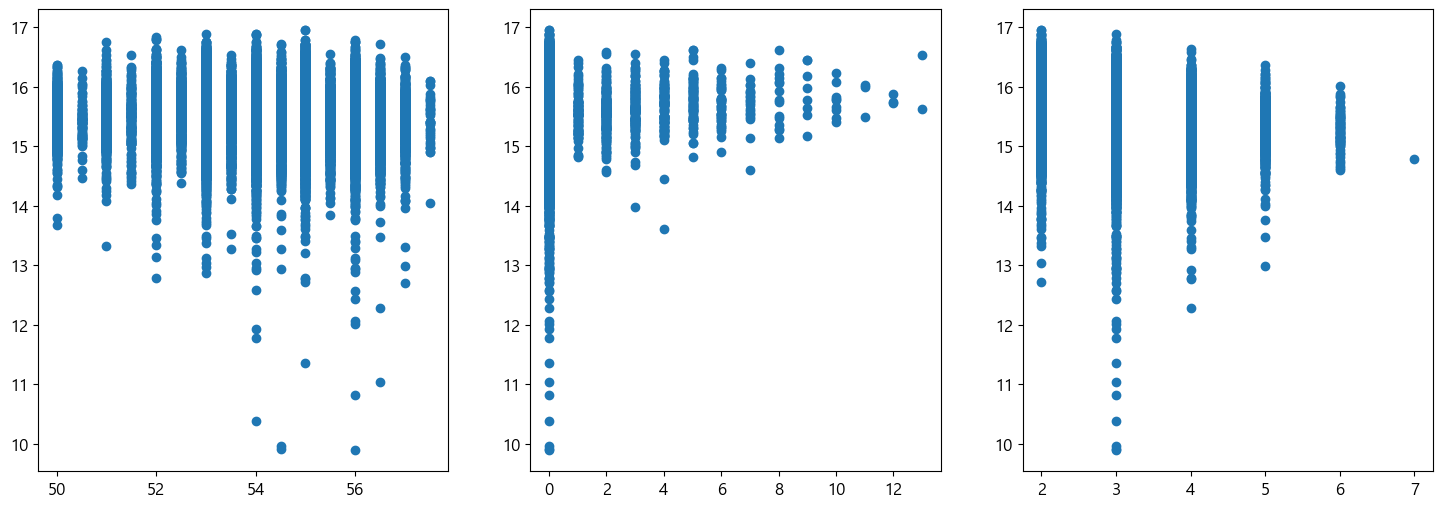

In [32]:
fig, ax = plt.subplots(1, 3, figsize = (18, 6))
ax[0].scatter(df['wgBudam'], df['Spd'])
ax[1].scatter(df['ills'], df['Spd'])
ax[2].scatter(df['age'], df['Spd'])
plt.show()

In [33]:
df2 = df[df['Spd'] >= 14]

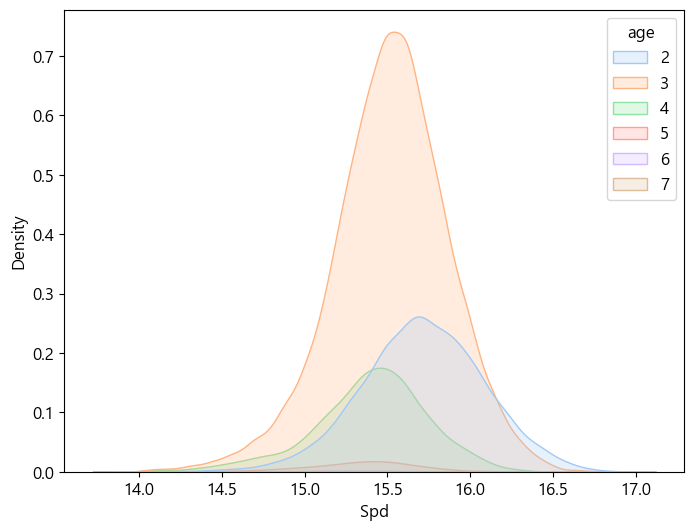

In [34]:
plt.figure()
sb.kdeplot(data = df2, x = 'Spd', hue = 'age', warn_singular = False, fill = True, palette = 'pastel')
plt.show()

In [35]:
from scipy.stats import skew

In [36]:
for i in range(2, 8):
    tmp = df3[df3['age'] == i]
    print(f"{i}세 왜도 : {skew(tmp['Spd'])}")

2세 왜도 : nan
3세 왜도 : nan
4세 왜도 : nan
5세 왜도 : -0.050724959522020344
6세 왜도 : -0.2425598669247876
7세 왜도 : nan


c:\Users\yjg10\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1182: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean
c:\Users\yjg10\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1304: RuntimeWarning: Mean of empty slice.
  mean = a.mean(axis, keepdims=True)
c:\Users\yjg10\anaconda3\Lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
c:\Users\yjg10\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\yjg10\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [37]:
skew(df2['Spd'])

nan

In [38]:
list(df2.skew(numeric_only = True))

[0.17409497935027868,
 0.4924495179006301,
 -0.07737163634606088,
 0.5467934813796351,
 7.990075658306982,
 0.616323474820292,
 7.5742286093446305,
 0.7415383512806129,
 6.827330906360495,
 1.2015752080736728,
 7.072041842059208,
 3.5737893408219548,
 12.879554252570363,
 0.0,
 0.0,
 0.3904919793038113,
 6.226367541927227,
 0.3904919793038113,
 0.0,
 0.40433440115422115,
 0.4042586266281628,
 0.39741938659669374,
 0.3993504386676956,
 0.9268069706954264,
 3.5737893408219548,
 0.0,
 0.0,
 0.0,
 0.9102604603198117,
 1.1221098768943036,
 1.1243018921719445,
 0.6526403700164727,
 0.8806216045470645,
 0.1729588857510063,
 21.454504783270174,
 0.19078229879711744,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 6.629312948699714,
 -0.6909290939849004,
 6.9609963763072455,
 0.18839537246711746,
 0.0,
 -0.0454545166788298,
 0.562909797119333,
 0.9500003555265699,
 -1.5861039264041659,
 -0.08916763286133213,
 0.20810549608888176,
 -0.31170196372490605,
 7.230230541846467,
 7.2278063930425684,
 0.723

In [39]:
df2.describe()

,Unnamed: 0,age,birthday,buG1fAccTime,buG1fOrd,buG2fAccTime,buG2fOrd,buG3fAccTime,buG3fOrd,buG4fAccTime,...,sjS1fOrd,sj_1cOrd,sj_2cOrd,sj_3cOrd,sj_4cOrd,wgBudam,wgJk,winOdds,Spd,ills
count,46556.000000,46556.000000,4.655600e+04,46556.000000,46556.000000,46556.000000,46556.000000,46556.000000,46556.000000,46556.000000,...,46556.000000,46556.000000,46556.000000,46556.000000,46556.000000,46556.000000,46556.000000,46556.000000,4.655600e+04,46556.000000
mean,9339.584243,2.929332,2.016113e+07,26.165122,2.510912,20.885411,2.503974,15.876806,2.493384,9.330692,...,3.714344,0.117729,0.117751,3.713957,3.710735,54.325017,-0.312097,243.571211,inf,0.053398
std,5685.162389,0.664381,2.541819e+04,32.549498,4.470910,26.287585,4.382306,20.430980,4.245396,15.079952,...,5.732047,1.363026,1.363331,5.731829,5.729733,1.429774,0.931682,1380.429933,NaN,0.506541
min,0.000000,2.000000,2.009053e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,-4.000000,0.000000,1.400000e+01,0.000000
25%,4497.000000,3.000000,2.014033e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,53.500000,0.000000,6.600000,1.532567e+01,0.000000
50%,9128.000000,3.000000,2.016042e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,2.000000,2.000000,54.000000,0.000000,20.100000,1.555210e+01,0.000000
75%,13805.000000,3.000000,2.018041e+07,62.900000,5.000000,49.800000,5.000000,37.600000,5.000000,25.300000,...,7.000000,0.000000,0.000000,7.000000,7.000000,55.500000,0.000000,63.000000,1.579779e+01,0.000000
max,21066.000000,7.000000,2.021051e+07,120.300000,99.000000,86.700000,99.000000,68.200000,99.000000,55.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,57.500000,0.000000,9999.900000,inf,13.000000


In [40]:
df2['Spd'].max()

inf

In [41]:
df3 = df2[df2['Spd'] != np.inf]

In [46]:
tmp = df3[df3['hrNo'] == 35404]

In [52]:
tmp = tmp.sort_values('date')

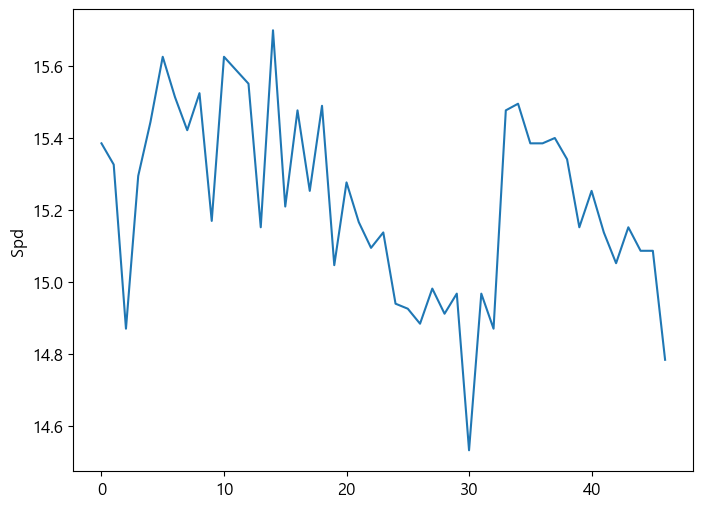

In [58]:
plt.figure()
sb.lineplot(data = tmp, x = range(0, len(tmp)), y = 'Spd')
plt.show()

In [64]:
tmp['Spd']

86100     15.384615
85173     15.325670
84682     14.869888
110927    15.294118
110597    15.444015
110265    15.625000
109965    15.513126
109516    15.421115
109170    15.523933
108832    15.169195
108441    15.625000
108133    15.587530
107777    15.550239
107621    15.151515
107231    15.698587
106916    15.209125
106562    15.476190
106191    15.252622
105858    15.488867
105301    15.046296
140612    15.276146
140237    15.165877
139824    15.094340
139432    15.137181
139063    14.939309
138649    14.925373
138308    14.883721
137783    14.981273
137423    14.911463
136931    14.967259
136631    14.532243
135218    14.967259
134843    14.869888
134453    15.476190
134094    15.494636
133752    15.384615
133413    15.384615
132994    15.399423
132397    15.340364
166222    15.151515
166006    15.252622
165623    15.137181
165023    15.051740
164603    15.151515
163963    15.086207
162344    15.086207
185748    14.783527
Name: Spd, dtype: float64

In [65]:
tmp.to_csv("./한마리.csv", index=False)